# Water masses of the future: volume

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import gcsfs

import warnings
warnings.simplefilter("ignore")

In [3]:
fs = gcsfs.GCSFileSystem(token='anon', access='read_only')

In [4]:
cat = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
#cat = pd.read_csv('ftp://ftp.cgd.ucar.edu/archive/aletheia-data/intake-esm-datastore/catalogs/glade-cmip6.csv')
#cat.info()

In [5]:
# define a simple search on keywords
def search_df(df, verbose= False, **search):
    "search by keywords - if list, then match exactly, otherwise match as substring"
    keys = ['activity_id','institution_id','source_id','experiment_id','member_id', 'table_id', 'variable_id', 'grid_label']
    d = df
    for skey in search.keys():
        
        if isinstance(search[skey], str):  # match a string as a substring
            d = d[d[skey].str.contains(search[skey])]
        else:
            dk = []
            for key in search[skey]:       # match a list of strings exactly
                dk += [d[d[skey]==key]]
            d = pd.concat(dk)
            keys.remove(skey)
    if verbose:
        for key in keys:
            print(key,' = ',list(d[key].unique()))      
    return d

## Load CMIP6 datasets

In [6]:
picontrol = search_df(cat, experiment_id=['piControl'], 
                      source_id=['CESM2', 'GFDL-CM4'],
                      table_id='Omon', 
                      variable_id=['thetao', 'so'], 
                      grid_label=['gr'], verbose=True)

activity_id  =  ['CMIP']
institution_id  =  ['NCAR', 'NOAA-GFDL']
member_id  =  ['r1i1p1f1']
table_id  =  ['Omon']


In [57]:
historical = search_df(cat, experiment_id=['historical'], 
                       source_id=['CESM2', 'GFDL-CM4'],
                       table_id='Omon', 
                       variable_id=['thetao', 'so'], 
                       grid_label=['gr'], verbose=True)

activity_id  =  ['CMIP']
institution_id  =  ['NCAR', 'NOAA-GFDL']
member_id  =  ['r10i1p1f1', 'r11i1p1f1', 'r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r5i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1']
table_id  =  ['Omon']


In [58]:
ssp585 = search_df(cat, experiment_id=['ssp585'], table_id='Omon',
                   variable_id=['thetao', 'so'], 
                   grid_label=['gr'], verbose=True)

activity_id  =  ['ScenarioMIP']
institution_id  =  ['NCAR', 'NOAA-GFDL']
source_id  =  ['CESM2-WACCM', 'CESM2', 'GFDL-CM4']
member_id  =  ['r1i1p1f1', 'r2i1p1f1']
table_id  =  ['Omon']


In [10]:
#ssp585 = search_df(cat, table_id='Omon', variable_id=['thetao', 'so'], 
#                   grid_label=['gn'], verbose=True)

In [11]:
#zstores_hist = historical.zstore.unique()
#
#dset_dict_hist = {}
#for zstore in zstores_hist:
#    name = zstore.split('gs://cmip6/')[1].replace('/','.')[:-1]
#    print(name)
#
#    ds = xr.open_zarr(fs.get_mapper(zstore))       # DO NOT USE "decode_times = False"
#    print(dict(ds.dims),'\n')
#    
#    dset_dict_hist[name] = ds

In [9]:
def create_dsdict_from_cat(df):
    """ thanks naomi"""
    zstores = df.zstore.unique()

    dset_dict = {}
    for zstore in zstores:
        name = zstore.split('gs://cmip6/')[1].replace('/','.')[:-1]
        print(name)

        ds = xr.open_zarr(fs.get_mapper(zstore))       # DO NOT USE "decode_times = False"
        print(dict(ds.dims),'\n')
    
        dset_dict[name] = ds
    return dset_dict

In [10]:
dict_piC = create_dsdict_from_cat(picontrol)

CMIP.NCAR.CESM2.piControl.r1i1p1f1.Omon.thetao.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 14400} 

CMIP.NOAA-GFDL.GFDL-CM4.piControl.r1i1p1f1.Omon.thetao.gr
{'bnds': 2, 'lat': 180, 'lev': 35, 'lon': 360, 'time': 6000} 

CMIP.NCAR.CESM2.piControl.r1i1p1f1.Omon.so.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 14400} 

CMIP.NOAA-GFDL.GFDL-CM4.piControl.r1i1p1f1.Omon.so.gr
{'bnds': 2, 'lat': 180, 'lev': 35, 'lon': 360, 'time': 6000} 



In [59]:
dict_hist = create_dsdict_from_cat(historical)

CMIP.NCAR.CESM2.historical.r10i1p1f1.Omon.thetao.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 1980} 

CMIP.NCAR.CESM2.historical.r11i1p1f1.Omon.thetao.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 1980} 

CMIP.NCAR.CESM2.historical.r1i1p1f1.Omon.thetao.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 1980} 

CMIP.NCAR.CESM2.historical.r2i1p1f1.Omon.thetao.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 1980} 

CMIP.NCAR.CESM2.historical.r3i1p1f1.Omon.thetao.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 1980} 

CMIP.NCAR.CESM2.historical.r4i1p1f1.Omon.thetao.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 1980} 

CMIP.NCAR.CESM2.historical.r5i1p1f1.Omon.thetao.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 1980} 

CMIP.NCAR.CESM2.historical.r6i1p1f1.Omon.thetao.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 1980} 

CMIP.NCAR.CESM2.historical.r7i1p1f1.Omon.thetao.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time'

In [62]:
dict_ssp585 = create_dsdict_from_cat(ssp585)

ScenarioMIP.NCAR.CESM2-WACCM.ssp585.r1i1p1f1.Omon.thetao.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 1032} 

ScenarioMIP.NCAR.CESM2.ssp585.r2i1p1f1.Omon.thetao.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 1032} 

ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp585.r1i1p1f1.Omon.thetao.gr
{'bnds': 2, 'lat': 180, 'lev': 35, 'lon': 360, 'time': 1032} 

ScenarioMIP.NCAR.CESM2-WACCM.ssp585.r1i1p1f1.Omon.so.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 1032} 

ScenarioMIP.NCAR.CESM2.ssp585.r2i1p1f1.Omon.so.gr
{'d2': 2, 'lat': 180, 'lev': 33, 'lon': 360, 'time': 1032} 

ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp585.r1i1p1f1.Omon.so.gr
{'bnds': 2, 'lat': 180, 'lev': 35, 'lon': 360, 'time': 1032} 



## Volumes in piControl

In [11]:
from xhistogram.xarray import histogram

In [15]:
CM4_thetao_piC = dict_piC['CMIP.NOAA-GFDL.GFDL-CM4.piControl.r1i1p1f1.Omon.thetao.gr']

CM4_so_piC = dict_piC['CMIP.NOAA-GFDL.GFDL-CM4.piControl.r1i1p1f1.Omon.so.gr']

CESM2_so_piC = dict_piC['CMIP.NCAR.CESM2.piControl.r1i1p1f1.Omon.so.gr']

CESM2_thetao_piC = dict_piC['CMIP.NCAR.CESM2.piControl.r1i1p1f1.Omon.thetao.gr']

In [50]:
#CESM2_thetao_piC

### Set up bins and volume of cells for histogram

In [16]:
sbins = np.arange(31, 38, 0.025)
tbins = np.arange(-2, 32, 0.1)

In [83]:
# Create a dz variable, all datasets are on common grid so this should work with everything
dz = np.diff(CESM2_thetao_piC['lev'])
dz =np.insert(dz, 0, dz[0])
dz = xr.DataArray(dz, coords= {'lev': CESM2_thetao_piC['lev']}, dims='lev')

#print(CESM2_thetao_piC['lev'])
#print(dz)
## weight by volume of grid cell (resolution = 5degree, 1degree=110km)
dVol_cesm2 = dz * (110e3) * (110e3*np.cos(CESM2_thetao_piC['lat']*np.pi/180))

<xarray.DataArray 'lev' (lev: 33)>
array([   0.,   10.,   20.,   30.,   50.,   75.,  100.,  125.,  150.,  200.,
        250.,  300.,  400.,  500.,  600.,  700.,  800.,  900., 1000., 1100.,
       1200., 1300., 1400., 1500., 1750., 2000., 2500., 3000., 3500., 4000.,
       4500., 5000., 5500.])
Coordinates:
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
Attributes:
    axis:           Z
    bounds:         lev_bnds
    long_name:      ocean model level
    positive:       down
    standard_name:  olevel
    units:          m


In [80]:
dVol_cesm2.sum()

<xarray.DataArray ()>
array(7.6400308e+15)

In [82]:
# not quite
dz = np.diff(CM4_thetao_piC['lev'])
dz =np.insert(dz, 0, dz[0])
dz = xr.DataArray(dz, coords= {'lev': CM4_thetao_piC['lev']}, dims='lev')

#print(CM4_thetao_piC['lev'])
#print(dz)
# weight by volume of grid cell (resolution = 5degree, 1degree=110km)
dVol_cm4 = dz * (110e3) * (110e3*np.cos(CM4_thetao_piC['lat']*np.pi/180))

<xarray.DataArray 'lev' (lev: 35)>
array([2.5000e+00, 1.0000e+01, 2.0000e+01, 3.2500e+01, 5.1250e+01, 7.5000e+01,
       1.0000e+02, 1.2500e+02, 1.5625e+02, 2.0000e+02, 2.5000e+02, 3.1250e+02,
       4.0000e+02, 5.0000e+02, 6.0000e+02, 7.0000e+02, 8.0000e+02, 9.0000e+02,
       1.0000e+03, 1.1000e+03, 1.2000e+03, 1.3000e+03, 1.4000e+03, 1.5375e+03,
       1.7500e+03, 2.0625e+03, 2.5000e+03, 3.0000e+03, 3.5000e+03, 4.0000e+03,
       4.5000e+03, 5.0000e+03, 5.5000e+03, 6.0000e+03, 6.5000e+03])
Coordinates:
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    axis:         Z
    bounds:       lev_bnds
    description:  generic ocean model vertical coordinate (nondimensional or ...
    long_name:    ocean model level
    positive:     down
    units:        m


In [76]:
dVol_cm4.sum()

<xarray.DataArray ()>
array(9.01967339e+15)

In [51]:
#assert (dVol_cesm2 == dVol_cm4).all()

### Let's get this party started

In [20]:
from dask_kubernetes import KubeCluster
from dask.distributed import Client
cluster = KubeCluster()
cluster.adapt(minimum=1, maximum=10)
client = Client(cluster)
cluster

In [21]:
#cluster.close()

### CESM2 and CM4 - piControl

In [53]:
hTS_CESM2 = histogram(CESM2_so_piC['so'],
                      CESM2_thetao_piC['thetao'],
                      bins=[sbins, tbins],
                      dim=('lon', 'lat', 'lev'),
                      weights=dVol_cesm2)

In [54]:
hTS_CESM2

<xarray.DataArray 'histogram_so_thetao' (time: 14400, so_bin: 279, thetao_bin: 339)>
dask.array<getitem, shape=(14400, 279, 339), dtype=float64, chunksize=(11, 279, 339), chunktype=numpy.ndarray>
Coordinates:
  * time        (time) object 0001-01-15 12:59:59 ... 1200-12-15 12:00:00
  * so_bin      (so_bin) float64 31.01 31.04 31.06 31.09 ... 37.91 37.94 37.96
  * thetao_bin  (thetao_bin) float64 -1.95 -1.85 -1.75 ... 31.65 31.75 31.85

In [56]:
vol_nadw_CESM2 = hTS_CESM2.sel(so_bin=slice(34.8, 35.), 
                               thetao_bin=slice(1.5,4)).sum(dim=['so_bin', 'thetao_bin'])

In [57]:
vol_nadw_CESM2.load()

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://10.32.5.12:41840 remote=tcp://10.32.5.12:38325>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://10.32.5.12:41842 remote=tcp://10.32.5.12:38325>


<xarray.DataArray 'histogram_so_thetao' (time: 14400)>
array([1.19804457e+17, 1.19808830e+17, 1.19838399e+17, ...,
       2.08909331e+17, 2.08857520e+17, 2.08815188e+17])
Coordinates:
  * time     (time) object 0001-01-15 12:59:59 ... 1200-12-15 12:00:00

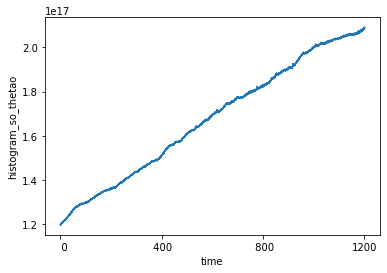

In [58]:
vol_nadw_CESM2.plot()

#### Let's refine with basin codes

In [53]:
basincodes = xr.open_dataset('../data/basin_codes.r360x180.nc')

basincodes_CESM2 = basincodes.rename({'Longitude': 'lon', 'Latitude': 'lat'})
basincodes_CESM2['lon'] = CESM2_so_piC['lon']
basincodes_CESM2['lat'] = CESM2_so_piC['lat']

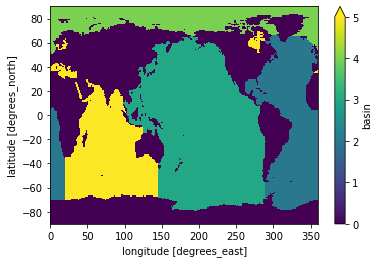

In [54]:
basincodes_CESM2['basin'].plot(vmin=0, vmax=5)

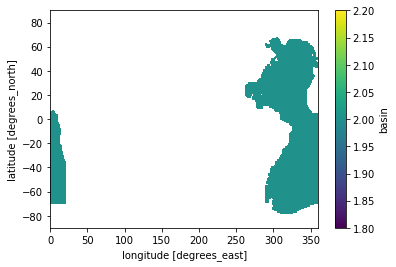

In [55]:
basincodes_CESM2['basin'].where(basincodes_CESM2['basin'] == 2).plot()

In [38]:
hTS_CESM2 = histogram(CESM2_so_piC['so'].where(basincodes_CESM2['basin'] == 2),
                      CESM2_thetao_piC['thetao'].where(basincodes_CESM2['basin'] == 2),
                      bins=[sbins, tbins],
                      dim=('lon', 'lat', 'lev'),
                      weights=dVol_cesm2)

In [39]:
atl_vol_nadw_CESM2 = hTS_CESM2.sel(so_bin=slice(34.8, 35.), 
                                   thetao_bin=slice(1.5,4)).sum(dim=['so_bin', 'thetao_bin'])

In [40]:
atl_vol_nadw_CESM2.load()

<xarray.DataArray 'histogram_so_thetao' (time: 14400)>
array([3.21612203e+16, 3.21588890e+16, 3.21407182e+16, ...,
       4.64435566e+16, 4.64352302e+16, 4.63825674e+16])
Coordinates:
  * time     (time) object 0001-01-15 12:59:59 ... 1200-12-15 12:00:00

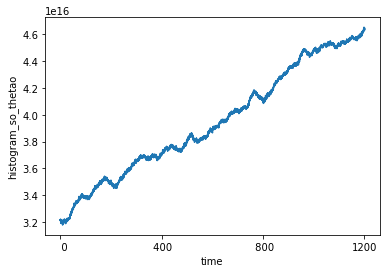

In [41]:
atl_vol_nadw_CESM2.plot()

In [48]:
ds_nadw_CESM2 = xr.Dataset()
ds_nadw_CESM2['vol_nadw_atl'] = atl_vol_nadw_CESM2
ds_nadw_CESM2.to_netcdf('../data/nadw_CESM2_piC.nc')

In [22]:
hTS_CM4 = histogram(CM4_so_piC['so'],
                    CM4_thetao_piC['thetao'],
                    bins=[sbins, tbins],
                    dim=('lon', 'lat', 'lev'),
                    weights=dVol_cm4)

In [56]:
#assert (CM4_so_piC['so'].lev.values == CM4_thetao_piC['thetao'].lev.values).all()

In [23]:
#CM4_so_pic = CM4_so_piC.unify_chunks()
#CM4_so_pic = CM4_so_piC.chunks({'time': 25})

In [24]:
#hTS_CM4 = histogram(CM4_so_piC['so'],
#                    CM4_thetao_piC['thetao'],
#                    bins=[sbins, tbins],
#                    dim=('lon', 'lat', 'lev'),
#                    weights=dVol_cm4)

In [25]:
vol_nadw_CM4 = hTS_CM4.sel(so_bin=slice(34.8, 35.), 
                           thetao_bin=slice(1.5,4)).sum(dim=['so_bin', 'thetao_bin'])

In [26]:
vol_nadw_CM4.load()

<xarray.DataArray 'histogram_so_thetao' (time: 6000)>
array([1.19443985e+17, 1.19323221e+17, 1.19432044e+17, ...,
       1.14538570e+17, 1.14615831e+17, 1.14692345e+17])
Coordinates:
  * time     (time) object 0151-01-16 12:00:00 ... 0650-12-16 12:00:00

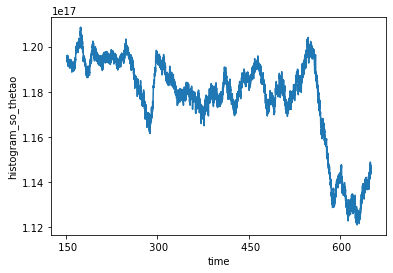

In [27]:
vol_nadw_CM4.plot()

#### Let's refine with basin codes

In [56]:
basincodes_CM4 = xr.open_dataset('../data/basin_codes.r360x180.nc')

basincodes_CM4 = basincodes_CM4.rename({'Longitude': 'lon', 'Latitude': 'lat'})
basincodes_CM4['lon'] = CM4_so_piC['lon']
basincodes_CM4['lat'] = CM4_so_piC['lat']

In [43]:
hTS_CM4 = histogram(CM4_so_piC['so'].where(basincodes_CM4['basin'] == 2),
                    CM4_thetao_piC['thetao'].where(basincodes_CM4['basin'] ==2),
                    bins=[sbins, tbins],
                    dim=('lon', 'lat', 'lev'),
                    weights=dVol_cm4)

In [52]:
#CM4_so_piC['lon']

In [45]:
atl_vol_nadw_CM4 = hTS_CM4.sel(so_bin=slice(34.8, 35.), 
                               thetao_bin=slice(1.5,4)).sum(dim=['so_bin', 'thetao_bin'])

In [46]:
atl_vol_nadw_CM4.load()

<xarray.DataArray 'histogram_so_thetao' (time: 6000)>
array([1.12950504e+17, 1.12857794e+17, 1.12903703e+17, ...,
       1.01668720e+17, 1.01758251e+17, 1.01950041e+17])
Coordinates:
  * time     (time) object 0151-01-16 12:00:00 ... 0650-12-16 12:00:00

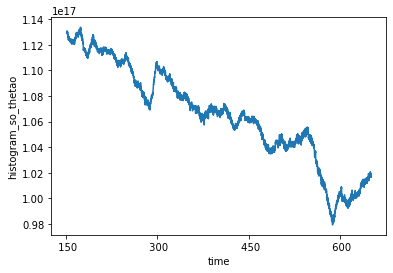

In [47]:
atl_vol_nadw_CM4.plot()

In [49]:
ds_nadw_CM4 = xr.Dataset()
ds_nadw_CM4['vol_nadw_atl'] = atl_vol_nadw_CM4
ds_nadw_CM4.to_netcdf('../data/nadw_CM4_piC.nc')

### CESM2 and CM4 - historical

In [61]:
CM4_thetao_hist = dict_hist['CMIP.NOAA-GFDL.GFDL-CM4.historical.r1i1p1f1.Omon.thetao.gr']

CM4_so_hist = dict_hist['CMIP.NOAA-GFDL.GFDL-CM4.historical.r1i1p1f1.Omon.so.gr']

CESM2_so_hist = dict_hist['CMIP.NCAR.CESM2.historical.r1i1p1f1.Omon.so.gr']

CESM2_thetao_hist = dict_hist['CMIP.NCAR.CESM2.historical.r1i1p1f1.Omon.thetao.gr']

In [70]:
del CM4_so_hist['so'].encoding['chunks']
CM4_so_hist = CM4_so_hist.chunk(chunks={'time': 12})

In [62]:
hTS_CESM2 = histogram(CESM2_so_hist['so'].where(basincodes_CESM2['basin'] == 2),
                      CESM2_thetao_hist['thetao'].where(basincodes_CESM2['basin'] == 2),
                      bins=[sbins, tbins],
                      dim=('lon', 'lat', 'lev'),
                      weights=dVol_cesm2)

In [63]:
atl_vol_nadw_CESM2_hist = hTS_CESM2.sel(so_bin=slice(34.8, 35.), 
                                        thetao_bin=slice(1.5,4)).sum(dim=['so_bin', 
                                                                          'thetao_bin'])

In [64]:
atl_vol_nadw_CESM2_hist.load()

<xarray.DataArray 'histogram_so_thetao' (time: 1980)>
array([3.87958662e+16, 3.88442496e+16, 3.88503287e+16, ...,
       3.92984491e+16, 3.92768388e+16, 3.92665652e+16])
Coordinates:
  * time     (time) object 1850-01-15 13:00:00 ... 2014-12-15 12:00:00

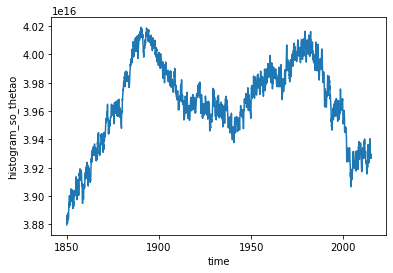

In [65]:
atl_vol_nadw_CESM2_hist.plot()

In [71]:
hTS_CM4 = histogram(CM4_so_hist['so'].where(basincodes_CM4['basin'] == 2),
                    CM4_thetao_hist['thetao'].where(basincodes_CM4['basin'] == 2),
                    bins=[sbins, tbins],
                    dim=('lon', 'lat', 'lev'),
                    weights=dVol_cm4)

In [72]:
atl_vol_nadw_CM4_hist = hTS_CM4.sel(so_bin=slice(34.8, 35.), 
                                    thetao_bin=slice(1.5,4)).sum(dim=['so_bin', 
                                                                      'thetao_bin'])

In [73]:
atl_vol_nadw_CM4_hist.load()

<xarray.DataArray 'histogram_so_thetao' (time: 1980)>
array([1.10886844e+17, 1.10867087e+17, 1.10880010e+17, ...,
       1.02131354e+17, 1.02154836e+17, 1.02342298e+17])
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00

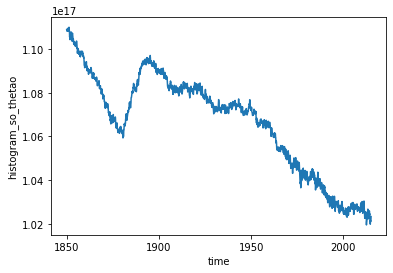

In [74]:
atl_vol_nadw_CM4_hist.plot()

#### Looking at heat content

In [85]:
hTS_CESM2heat = histogram(CESM2_so_hist['so'].where(basincodes_CESM2['basin'] == 2),
                          CESM2_thetao_hist['thetao'].where(basincodes_CESM2['basin'] == 2),
                          bins=[sbins, tbins],
                          dim=('lon', 'lat', 'lev'),
                          weights=dVol_cesm2*1035*4180*(273.15 + CESM2_thetao_hist['thetao']))

In [86]:
atl_heatc_nadw_CESM2_hist = hTS_CESM2heat.sel(so_bin=slice(34.8, 35.), 
                                              thetao_bin=slice(1.5,4)).sum(dim=['so_bin', 
                                                                                'thetao_bin'])

In [87]:
atl_heatc_nadw_CESM2_hist.load()

<xarray.DataArray 'histogram_so_thetao' (time: 1980)>
array([4.62204468e+25, 4.62781508e+25, 4.62855964e+25, ...,
       4.68182069e+25, 4.67924619e+25, 4.67801003e+25])
Coordinates:
  * time     (time) object 1850-01-15 13:00:00 ... 2014-12-15 12:00:00

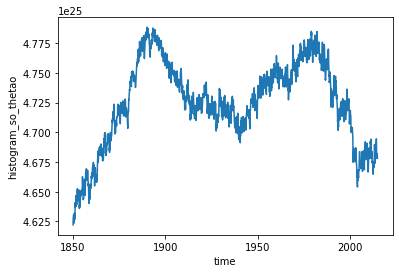

In [88]:
atl_heatc_nadw_CESM2_hist.plot()

### CESM2 and CM4 - ssp585